<a href="https://colab.research.google.com/github/nndelgado/-proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: podes armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes ampliarla)
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Sánchez", "Pérez", "Gómez", "Díaz"]
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Lucía", "José", "Marta"]

# Crear lista de datos
data = []
for _ in range(100):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    nro_dni = random.randint(10000000, 99999999)
    materia = random.choice(materias)
    nota_1er_trimestre = random.randint(1, 10)
    nota_2do_trimestre = random.randint(1, 10)
    nota_3er_trimestre = random.randint(1, 10)
    faltas = random.randint(0, 15)

    data.append([apellido, nombre, nro_dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas])


# Crear DataFrame
df = pd.DataFrame(data, columns=["Apellido", "Nombre", "Nro_DNI", "Materia", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

df

,Apellido,Nombre,Nro_DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,González,Marta,35140319,Historia,3,3,9,11
1,García,Laura,72109460,Geografía,10,2,9,12
2,Fernández,Pedro,66785934,Artes,9,7,8,2
3,Díaz,Luis,22592086,Historia,10,2,3,10
4,López,María,90247137,Lengua y Literatura,5,2,3,5
...,...,...,...,...,...,...,...,...
95,García,Pedro,27097620,Música,1,2,7,15
96,Pérez,María,43441340,Educación Física,1,10,8,4
97,García,Lucía,17532271,Ciencias Naturales,2,9,2,5
98,Díaz,José,29652348,Informática,6,3,1,10


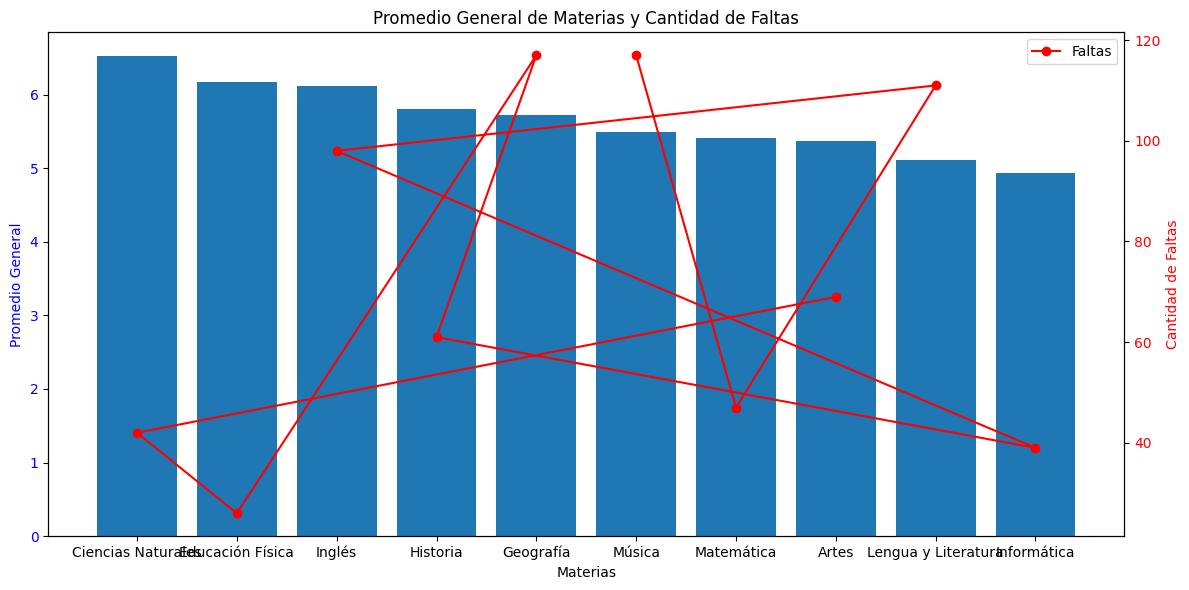

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
promedio_general = (promedio_por_materia['Nota 1er Trimestre'] + promedio_por_materia['Nota 2do Trimestre'] + promedio_por_materia['Nota 3er Trimestre']) / 3

# Ordenar las materias por promedio general de mayor a menor
promedio_general_ordenado = promedio_general.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia')['Faltas a clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el promedio general de cada materia
ax1.bar(promedio_general_ordenado.index, promedio_general_ordenado.values)
ax1.set_xlabel('Materias')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Agregar título y leyendas
plt.title('Promedio General de Materias y Cantidad de Faltas')
plt.legend(['Faltas'], loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [4]:
# prompt:  df.to_csv("datos_alumnos.csv", index=False)

df.to_csv("datos_alumnos.csv", index=False)